<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/bitcoin_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bitcoin Demo

In a bitcoin transaction, an **input** is the total value involved in the sender's side of a bitcoin transaction. This is usually equal to the output (the amount received) plus the fee.

Benford's Law states that in real life numerical data, the leading digits are likely to be small. Do Bitcoin inputs follow this law?

## Setup

In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats

## Data

In [36]:
btc = pd.read_csv("https://mshsu.github.io/probasets/data/Bitcoin.csv")
btc.head()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,e814f2086573cf6141e0eb9e83f4bbe5f2dde1583896c4...,224,NaN,2.0,0.0,0000000000000000000e5ce7fda35fc563a84a2593bdee...,556964.0,2018-11-16 21:30:40.000000 UTC,11/1/2018,1.0,2.0,4.706000e+03,4.446000e+03,False,260.0,"{\n ""inputs"": [{\n ""index"": ""0"",\n ""spe...","{\n ""outputs"": [{\n ""index"": ""0"",\n ""sc..."
1,56a36ddb1920f38f0f5479d56b4bacdcb9094cdae414d3...,339,NaN,1.0,0.0,0000000000000000014c2823ac15f62cbff6a6177f6e59...,554889.0,2018-11-02 15:20:50.000000 UTC,11/1/2018,2.0,1.0,1.233521e+09,1.233519e+09,False,1870.0,"{\n ""inputs"": [{\n ""index"": ""0"",\n ""spe...","{\n ""outputs"": [{\n ""index"": ""0"",\n ""sc..."
2,a19bf1fa7dbf8ae7b36f4b0c839f24883da0943fa928f8...,224,NaN,2.0,0.0,00000000000000000144c81be612b4eb90b17c0f9cecbc...,554771.0,2018-11-01 21:15:30.000000 UTC,11/1/2018,1.0,2.0,6.526000e+03,6.266000e+03,False,260.0,"{\n ""inputs"": [{\n ""index"": ""0"",\n ""spe...","{\n ""outputs"": [{\n ""index"": ""0"",\n ""sc..."
3,e4365cf275106be6f798f9f35df6a9f678e0391212994e...,515,NaN,2.0,0.0,0000000000000000014e0b69fe4785a8ee322a8c0bce69...,555158.0,2018-11-04 09:49:59.000000 UTC,11/1/2018,2.0,3.0,1.765490e+08,1.765440e+08,False,5000.0,"{\n ""inputs"": [{\n ""index"": ""0"",\n ""spe...","{\n ""outputs"": [{\n ""index"": ""0"",\n ""sc..."
4,0a583ee71fd159e682db9ed581bad2103683d5409adeb0...,226,NaN,2.0,556470.0,000000000000000001023afefa43696bb264af3d3a32de...,556471.0,2018-11-13 11:11:56.000000 UTC,11/1/2018,1.0,2.0,9.844731e+07,9.843601e+07,False,11300.0,"{\n ""inputs"": [{\n ""index"": ""0"",\n ""spe...","{\n ""outputs"": [{\n ""index"": ""0"",\n ""sc..."


## Calculating Proportions

In [37]:
obs = btc['input_value'].astype(str).apply(lambda x: x[0])
obs = obs[(obs != "n") & (obs != "0")].astype(int)
obs = obs.value_counts(normalize=True).sort_index().to_frame().reset_index(names="num").rename(columns={"input_value": "observed"})
obs

,num,observed
0,1,0.150301
1,2,0.182365
2,3,0.236473
3,4,0.206413
4,5,0.148297
5,6,0.030060
6,7,0.028056
7,8,0.003006
8,9,0.015030


## Benford's Law Distribution

In [38]:
d = pd.Series(range(1, 10))
bfd = np.log10((d + 1) / d).to_frame().rename(columns={0: "benford"})
bfd['num'] = bfd.index + 1
bfd[['num', 'benford']]

,num,benford
0,1,0.301030
1,2,0.176091
2,3,0.124939
3,4,0.096910
4,5,0.079181
5,6,0.066947
6,7,0.057992
7,8,0.051153
8,9,0.045757


## Visualization

<Axes: xlabel='num'>

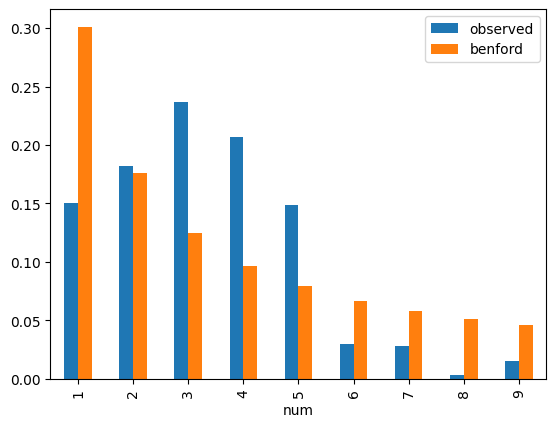

In [39]:
both = pd.merge(left=obs, right=bfd, on="num")
both.plot.bar(x="num")

## Chi-Square Goodness of Fit Test

In [40]:
observed = btc['input_value'].astype(str).apply(lambda x: x[0])
observed = observed[observed != "n"].astype(int)
observed = observed.value_counts().sort_index()
observed

benford = bfd['benford'] * sum(observed)
benford

test_stat, p = stats.chisquare(observed, benford)
print("Test Statistic:", test_stat)
print("p-value:", p)

Test Statistic: 460.1308671713185
p-value: 2.4941920126704084e-94
